# Сборный проект

# Описание проекта
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В датасете данные до 2016 года. Представим, что сейчас декабрь 2016 г., и нужно спланировать кампанию на 2017-й. Отработаем принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цели проекта.
1. Провести анализ данных.
2. Составить портрет каждого пользователя по регионам.
3. Проверить гипотезы на основе полученных данных.

# План на работу.
1. Импортировать библиотеки и открыть файлы.
2. Изучить общую информацию.
3. Заполнить пропуски и привести данные к нужным видам.
4. Провести исследовательский анализ данных.
5. Выполнить цели по проектам.

# Описание данных
data - название самого датасета. В нем хранятся данные с 1980 года по 2016.

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('datasets/games.csv')

###  Изучаем общую информацию о полученном датафрейме.

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем основную информацию с помощью метода инфо.

In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Приведем все данные к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

In [5]:
#проверим, что столбцы теперь с нижним регистром
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Преобразуем данные в нужные типы. 

Столбец "user_score" приведем к типу float64.

In [6]:
#TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
#Скорее всего либо не было отзывов вообше, либо их было очень мало для формирования рейтинга
#Заменим значение "tbd" - "to be determined" на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype(float)

In [7]:
# проверим изменился ли тип данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


#### Обработаем пропуски.

Посмотрим, сколько значений пропущено и в каких столбцах они встречаются.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

name -  оставим пропуски, как есть, потому что неизвестно, что за игры пропущены.

year_of_release - заполним пропуски медианой

genre - оставим пропуски, как есть. Так как их всего 2, также как и в столбце "name", то мне кажется, что кто-то просто опечатался при заполнении датасета. Поэтому такими ничтожно малыми данными можно пренебречь.

critic_score - заменим нулевые значения медианой.

user_score - заменим пропуски значения медианой.

rating - заменим пропуски на "not known".

Почему могли возникнуть пропуски:
- человеческий фактор
- технический сбой

In [11]:
# rating - заменим нулевые значения на "not known"
data['rating'] = data['rating'].fillna("not known")

In [12]:
# проверим исчезли ли пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Заполнение пропусков медианой или средним не корректно в данном случае. Это приводит к тому, что данные становятся синтетическими. Поэтому оставим пропуски, как они есть.

Изменим год релиза и приведем его к целочисленному виду.

In [18]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

У нас 2 пропуска в столбцах name и genre. Я предполагаю, что это человеческий фактор. поэтому заменим NaN на пропуски.

In [19]:
data.fillna(
    {"name" : " ", 
     "genre" : " "}
    , inplace=True
)

Просмотрим, есть ли дубликаты.

In [20]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [21]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?



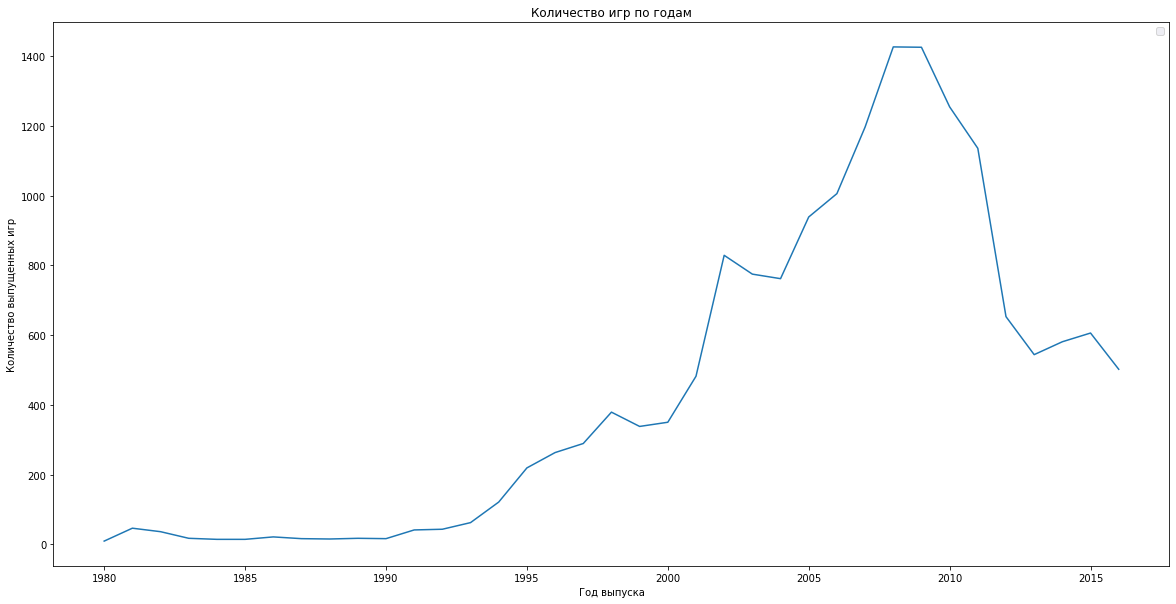

In [22]:
games_by_each_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(20,10))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Получается, что игры выпускались с 1980 по 2015 год. По 1990 год игр производилось меньше 200 штук. А вот после 1992 года график уверенно идет вверх. Самое большое количество игр было произведено в 2007 году. Затем потихоньку начался спад.
Посмотрим, как много игр выпускалось в разные года.

In [23]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

До 93 года выпускалось меньше 100 игр в год. Мне кажется значения до этого года включительно можно не рассматривать.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  sum_sales        16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
# создадим сводную таблицу с продажами по платформам
platform_grouped = data.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)
platform_grouped = platform_grouped.head(10)

In [26]:
print(platform_grouped)

          sum_sales
platform           
PS2         1255.77
X360         971.42
PS3          939.65
Wii          907.51
DS           806.12
PS           730.86
GBA          317.85
PS4          314.14
PSP          294.05
PC           259.52


Получается больше всего игр продавалось на платформах: PS2, X360, PS3. Теперь посмотрим на график.

Text(0, 0.5, 'Количество продаж')

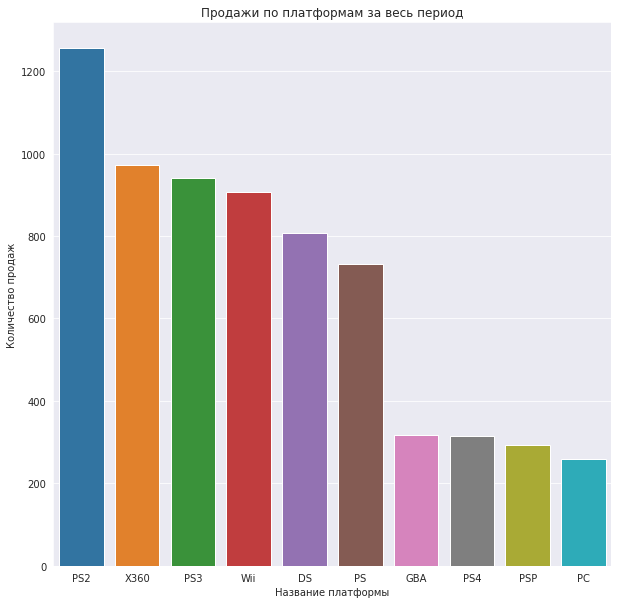

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x=platform_grouped.index,y=platform_grouped['sum_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Видно, что лидируют 3 платформы: PS2, X360, PS3. Теперь построим распределения по годам для каждой платформы.

In [28]:
#Составим список всех платформ.
top_platforms_list = data['platform'].unique()
top_platforms_list

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

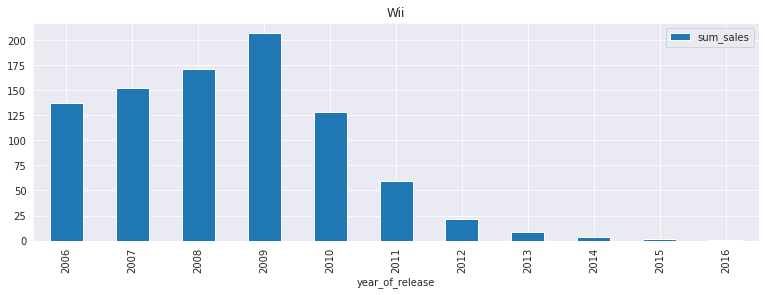

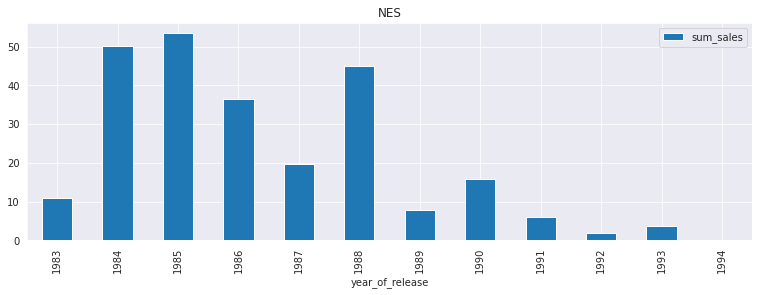

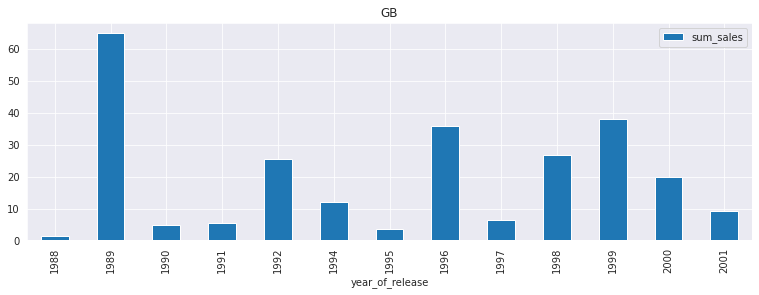

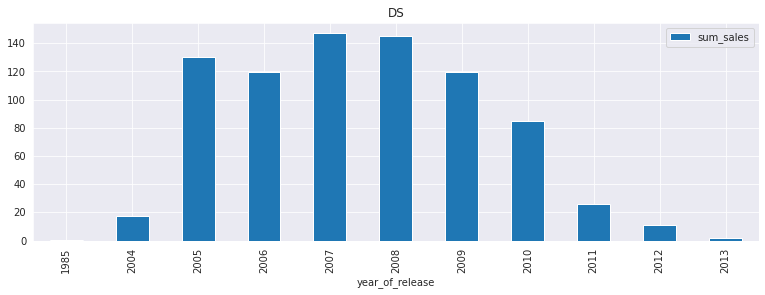

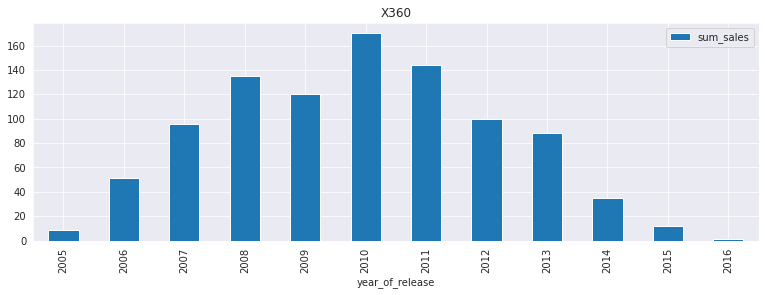

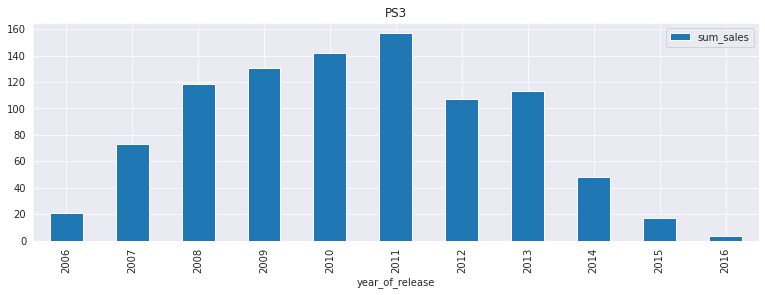

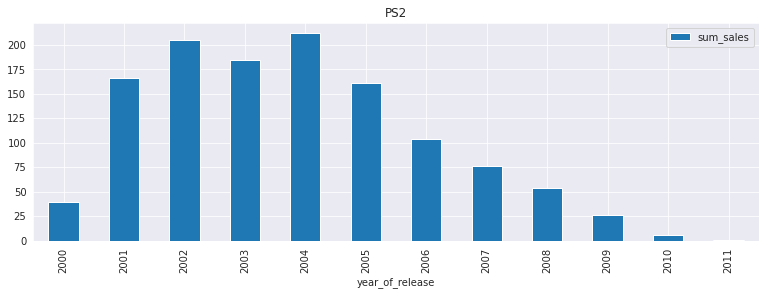

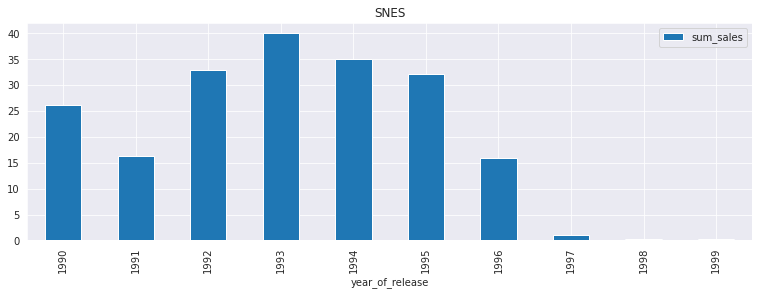

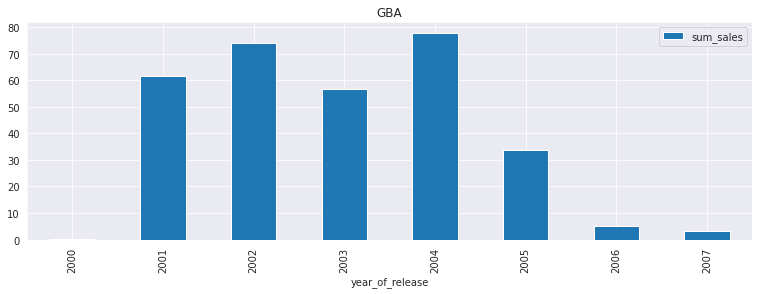

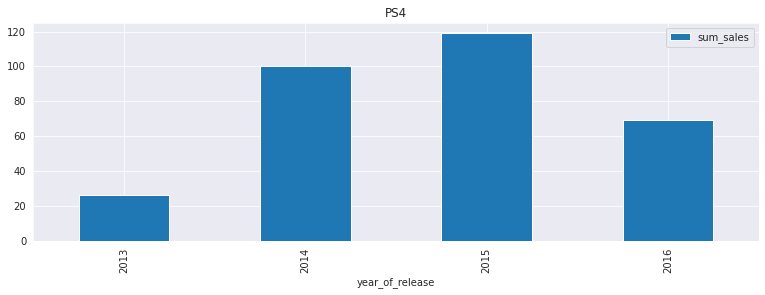

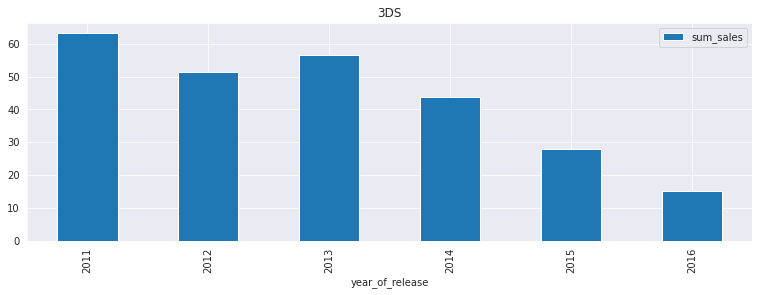

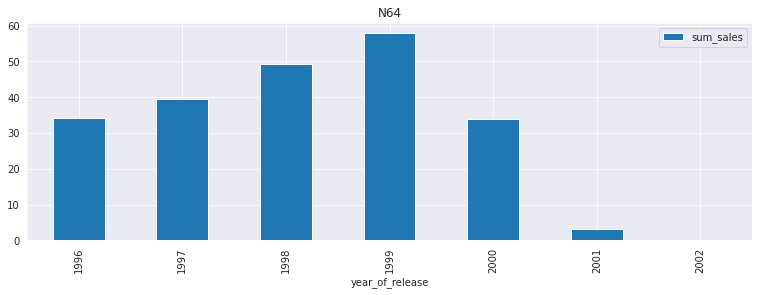

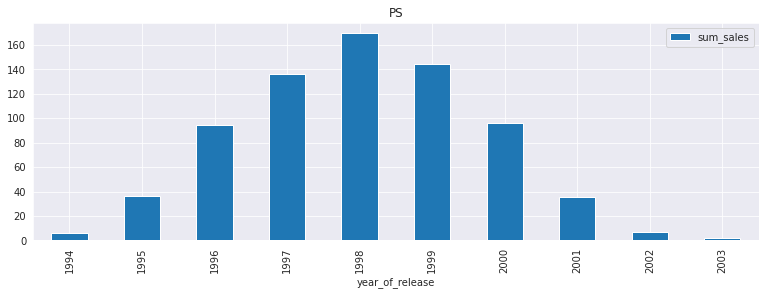

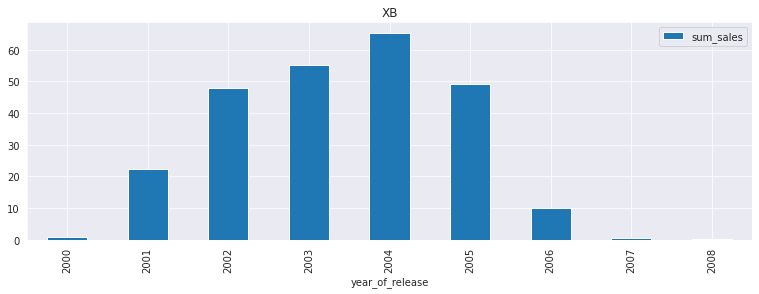

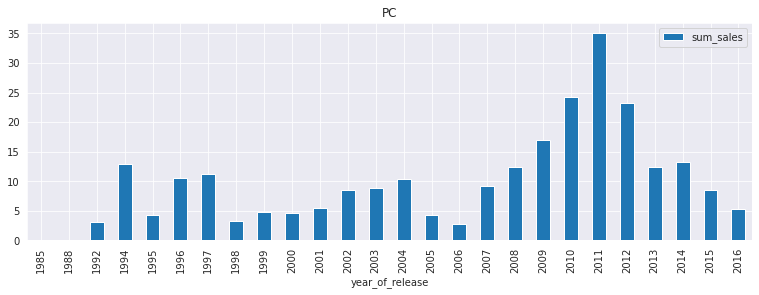

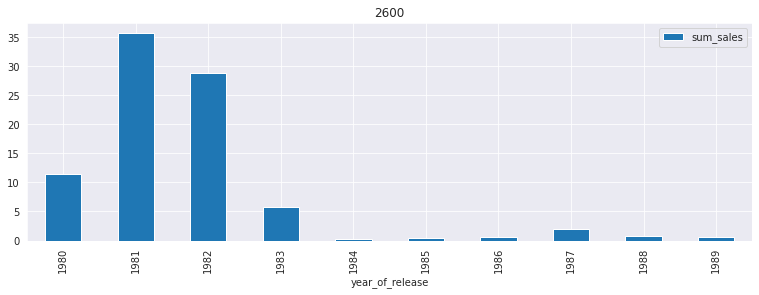

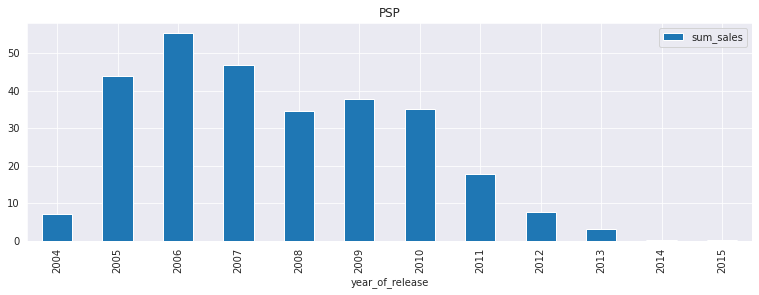

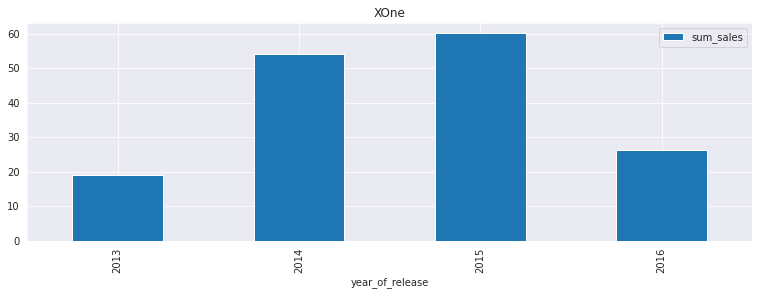

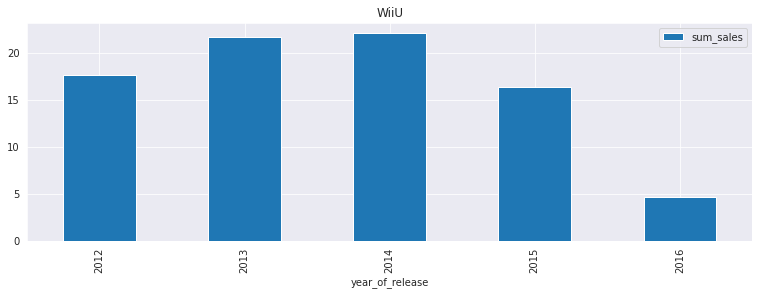

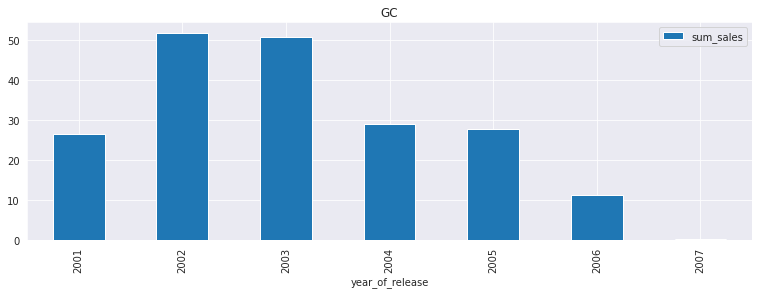

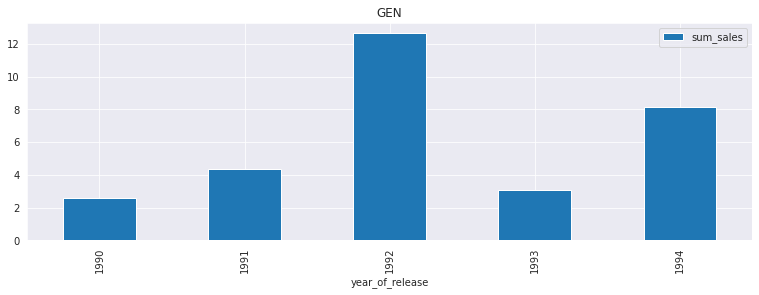

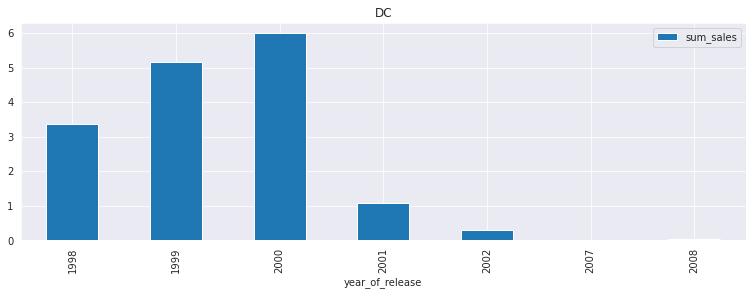

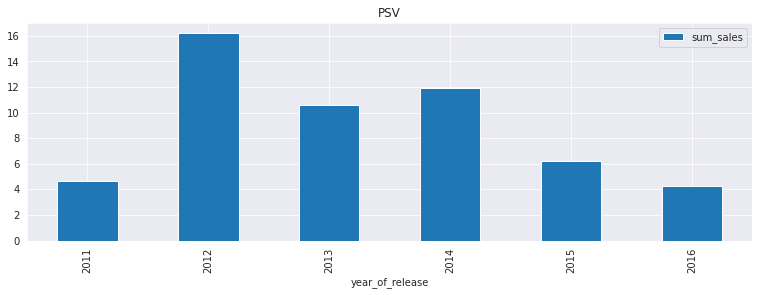

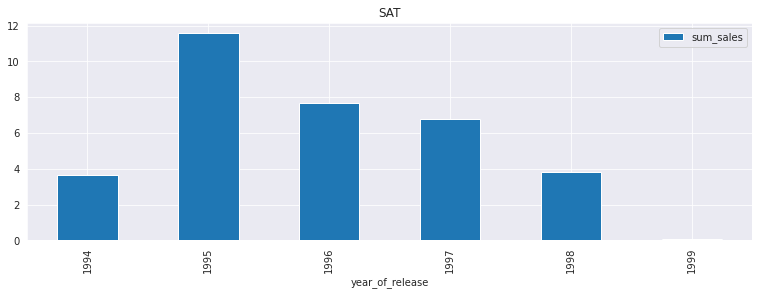

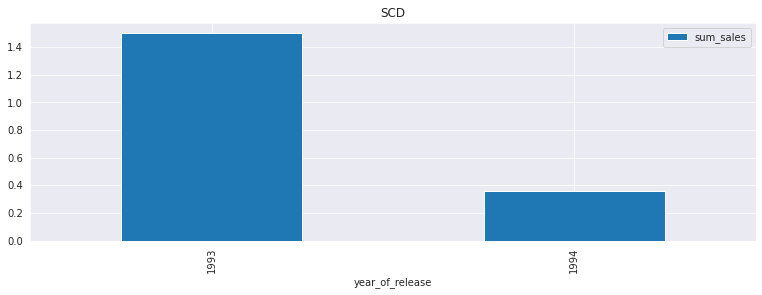

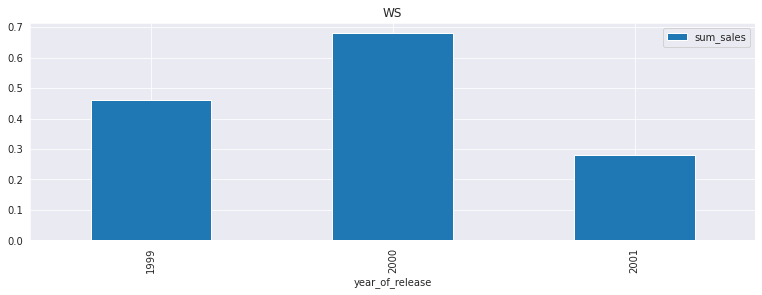

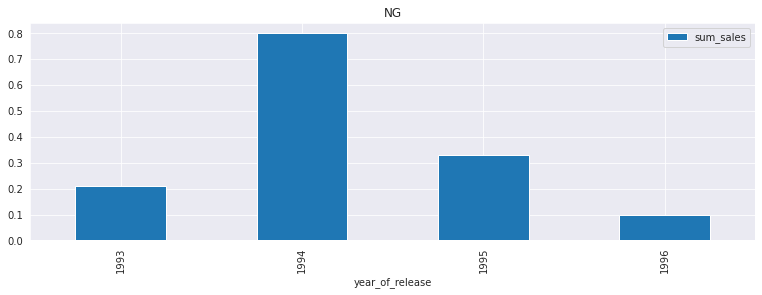

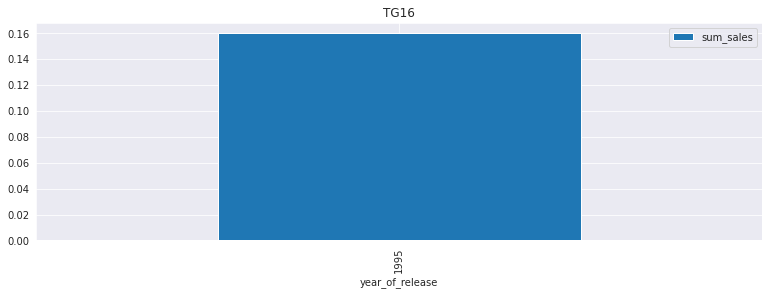

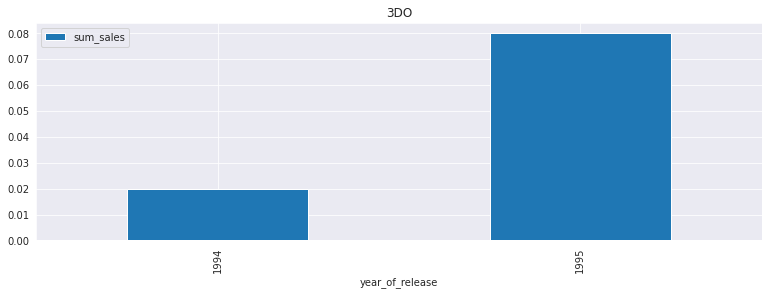

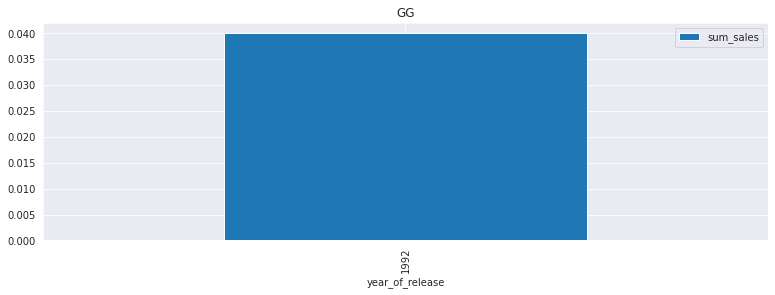

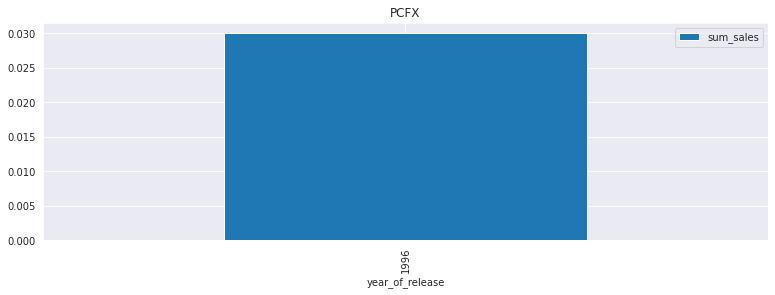

In [30]:

for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Платформа PS 2: существовала 10 лет и пики производста игр приходятся на 2004 и 2002 года, тогда было выпущено больше всего игр.

Платформа Х360 тоже существовала 10 лет. Ее пик производства игр пришелся на 2010 год, а потом потихоньку производство игр пошло на спад.

В среднем платформы существовали около 10 лет. Но есть платормы, которые существовали намного меньше. Скорее всего они выпускали менее популярные и успешные игры, поэтому такие проекты прожили намного меньше, чем их конкуренты.


#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Создадим новую переменную "year_of_researches", куда поместим данные за актуальные период, которые нужны нам для исследований. Я решила взять данные с 2014 года, так как компьютерные игры - это индустрия, которая слишком быстро меняется. 

In [31]:
data['year_of_researches'] = data.query('year_of_release > 2013')['year_of_release']

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Теперь сделаем выборку по платформам, только для сводной таблицы возьмем новый столбец "year_of_researches". Сделаем сводную таблицу по годам и платформам.

<AxesSubplot:xlabel='year_of_researches'>

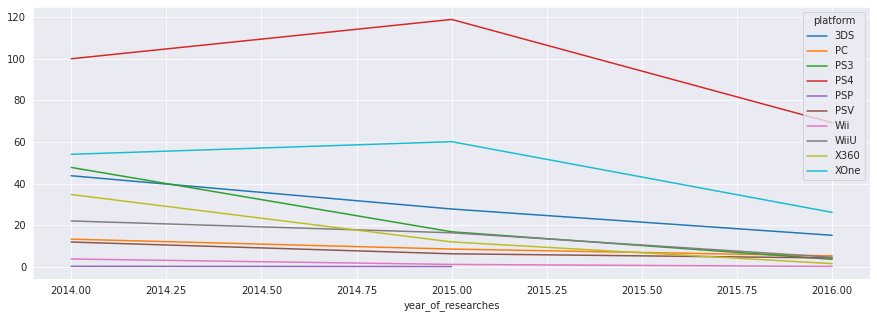

In [33]:
#выведем график и посмотрим, какие платформы лидировали по продажам в разных годах
data.query('platform in @top_platforms_list').pivot_table(index='year_of_researches', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(15, 5))

С 2014 по 2016 год лучше всего продажи были у следующих компаний: PS2 и DS. А хуже всего у XOne и WiiU.


В целом, к промежутку с 2014 года по 2016 год у всех компаний (кроме PS2 и DS) наблюдается спад продаж.
Я думаю, что на это влияют следующие показатели:
    
    - жизненный цикл платформ в среднем всего 10 лет, поэтому часть платформ к концу 2016 закончила свой жизненный цикл.
    
    
    Какие платформы я считаю наиболее перспективными?
    1. XOne
    2. PS4, потому что она новая.
    3. WiiU.
    А у остальных наблюдается спад.
  

In [34]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [35]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,year_of_researches
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,<NA>
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not known,40.24,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,<NA>
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,<NA>
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not known,31.38,<NA>


In [36]:
#отсортируем столбец с годами и выведем новую таблицу
period_data = data[data['year_of_researches']> 2013]
period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,year_of_researches
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not known,14.63,2015
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,2014
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,not known,11.68,2014
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,2015
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not known,7.98,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not known,0.01,2016
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,not known,0.01,2014
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not known,0.01,2016
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not known,0.01,2016


Создадим новую переменную, где сохраним 5 наиболее популярных платформ из задания выше.

In [37]:
list_of_top_5 = ['PS4','XOne','PS2','DS', 'PS3', 'WiiU'] 

top_5_platforms = period_data[period_data['platform'].isin(['PS4','XOne','PS2','DS', 'PS3'])]
top_5_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,year_of_researches
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not known,14.63,2015
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,2014
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,2015
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not known,7.98,2015
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,not known,0.01,2016
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01,2016
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,not known,0.01,2014
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not known,0.01,2016


Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.

Text(0, 0.5, 'Глобальные продажи')

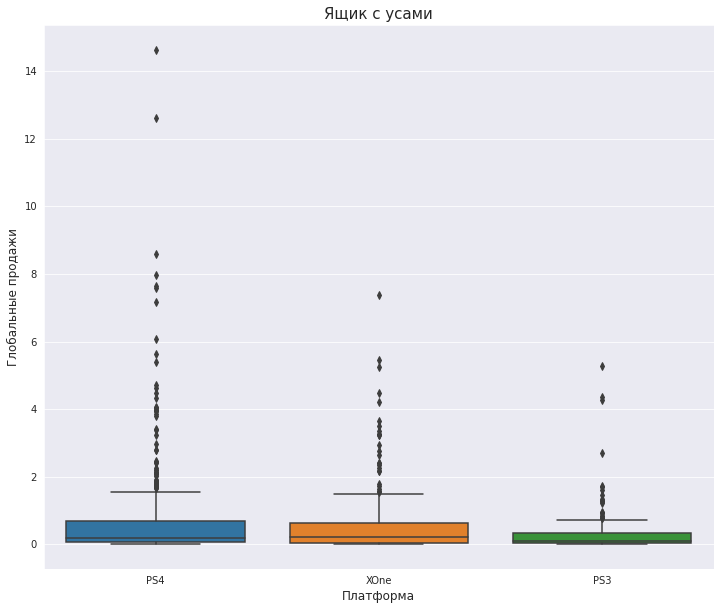

In [38]:
plt.figure(figsize=(12,10))
sns.boxplot(data=top_5_platforms, x='platform', y='sum_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Получается, что из 5 самых прибыльных платфом лидируют PS4, PS3 и XOne. А DS и PS2 отстают. 
Скорее всего эти платформы уже отжили свой век, поэтому мне кажется, что в 2017 году стоит ожидать рост от PS4 и XOne в первую очередь, а остальные будут снижать темпы роста.

<AxesSubplot:>

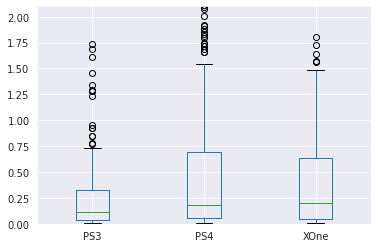

In [39]:
top_5_platforms.pivot_table(index = 'name', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,2.1))

Получается, что из 5 самых прибыльных платфом лидируют PS4, PS3 и XOne. А DS и PS2 отстают. Скорее всего эти платформы уже отжили свой век, поэтому мне кажется, что в 2017 году стоит ожидать рост от PS4 и XOne в первую очередь, а остальные будут снижать темпы роста.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Посчитаем корреляцию.

In [40]:
sp4 = data[data['platform']=='PS4']

In [41]:
sp4['user_score'].corr(sp4['sum_sales'])

-0.031957110204556376

Построим диаграмму рассеяния.

Text(0.5, 1.0, 'Корреляция между оценками пользователей и продажами')

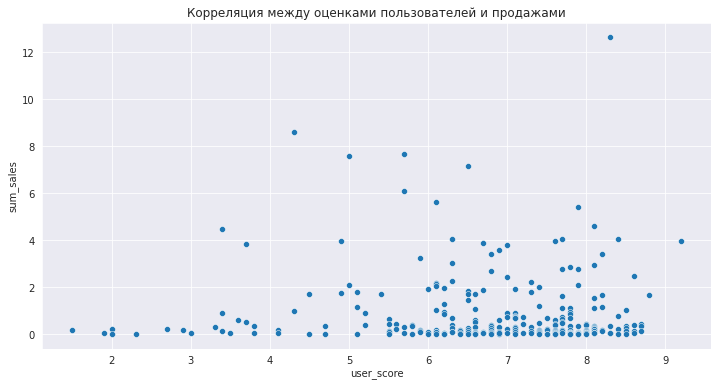

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sum_sales', data=sp4)
plt.title('Корреляция между оценками пользователей и продажами')

Здесь наблюдается отрицательная корреляция, то есть оценки пользователей, не влияют на продажи. Похоже пользователи не очень доверяют субъективному мнению других пользователей)))
Ну или это происходит потому, что в мире компьютерных игр очень быстро сменяются тренды. И если игру купило огромное количество людей и оставило свои отзывы, то скорее всего эта игра совсем скоро всем надоест.

Рассчитаем корреляцию между оценками критиков и продажами.

In [43]:
sp4 = data[data['platform']=='PS4']
sp4['critic_score'].corr(sp4['sum_sales'])

0.40656790206178095

Построим диаграмму рассеяния.

Text(0.5, 1.0, 'Корреляцию между оценками критиков и продажами')

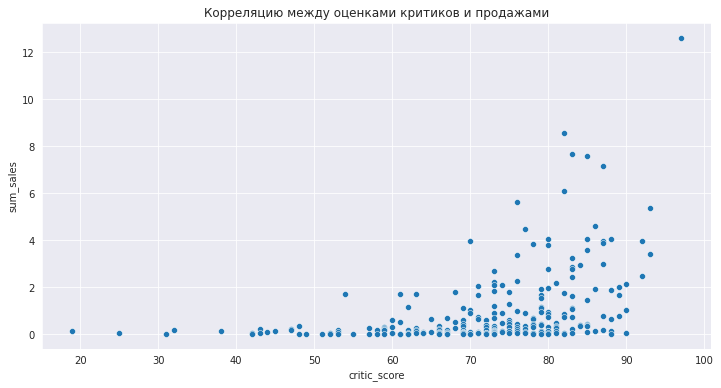

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sum_sales', data=sp4)
plt.title('Корреляцию между оценками критиков и продажами')

Мы видим прямую зависимость оценок критиков от покупок. Чем вышеоценка критиков, тем больше количество покупок. Я думаю, это связано с тем, что критики действительно отбирают хорошие игры. Смотрят на разные показатели, такие как графика, механика и другие. И когда выходит игра, в которую действительно интересно играть, то критики присваивают ей высокие баллы. Поэтому примерно от 60 баллов количество купленных игр возрастает. И чем больше баллов у игры, тем большее количество людей покупает игру с высоким рейтингом. Но, к сожалению, в 100 баллов не оценили ни одну игру. Ну может быть все впереди.

#### Соотнесите выводы с продажами игр на других платформах.

Здесь я решила действовать через функцию, которая будет отрисовывать графики рассеивания и считать корреляции.

In [45]:
def other_platform_grafiks(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= user_correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', user_correl)
    if 0.5 >= user_correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', user_correl)
    if 0.7 >= user_correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', user_correl)
    if 0.9 >= user_correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', user_correl)
    if 1 >= user_correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', user_correl)
    print('\n')
    
    if 0.1 >= user_correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', user_correl)
    if -0.1 >= user_correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', user_correl)
    if -0.3 >= user_correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', user_correl)
    if -0.5 >= user_correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', user_correl)
    if -0.7 >= user_correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', user_correl)
    if -0.9 >= user_correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', user_correl)
    print('\n')

А теперь выведем все графики.

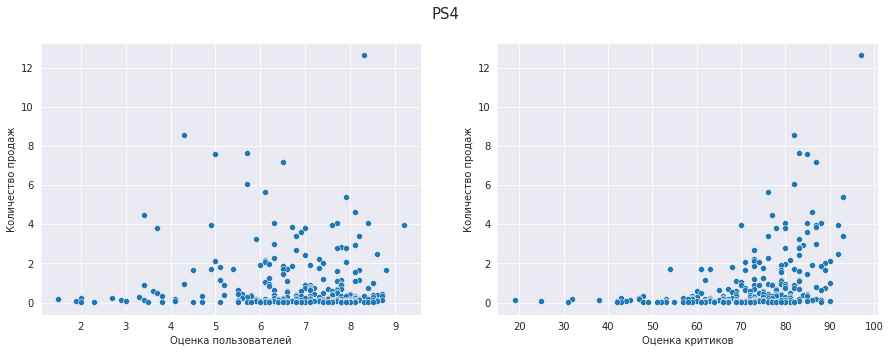

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40656790206178095


Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.031957110204556376




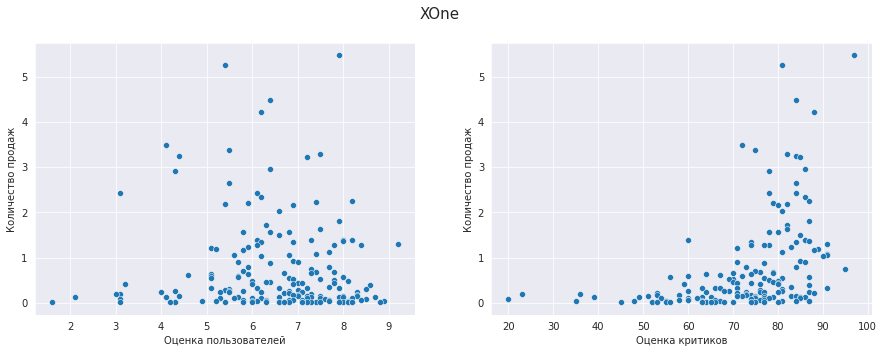

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084017


Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.06892505328279414




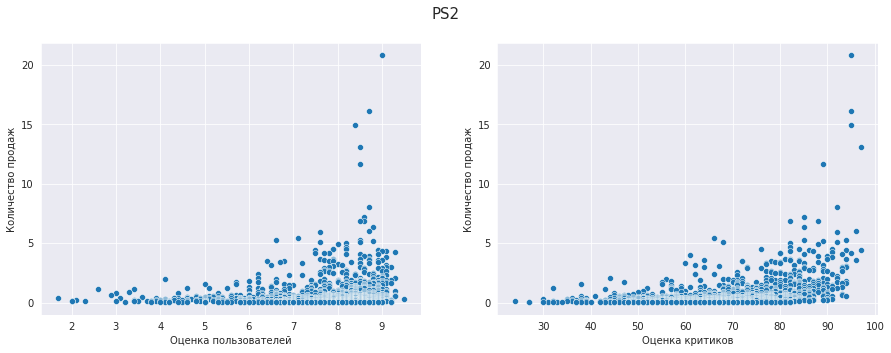

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.39543454945454876
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058227






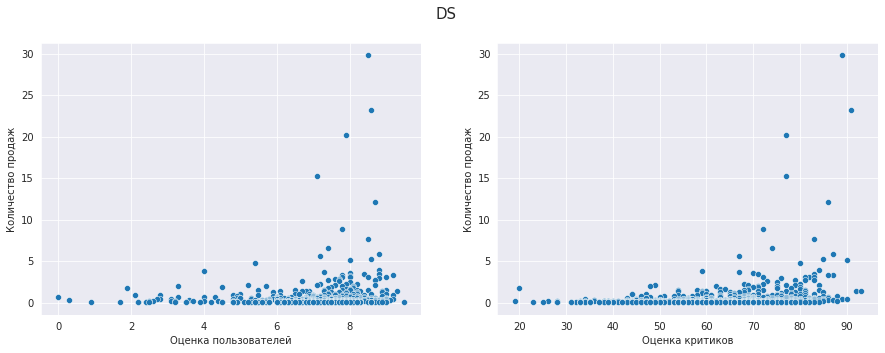

Корреляция между отзывами критиков и игровой платформой  DS : Слабая 0.23637945738859772
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.1304355011164249






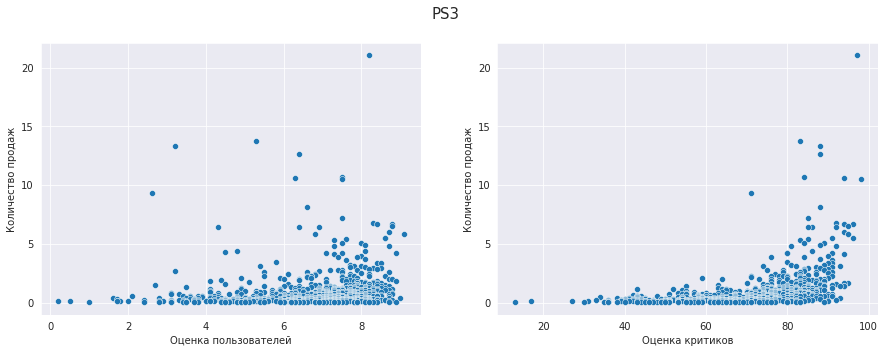

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.43243156856420634
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341692






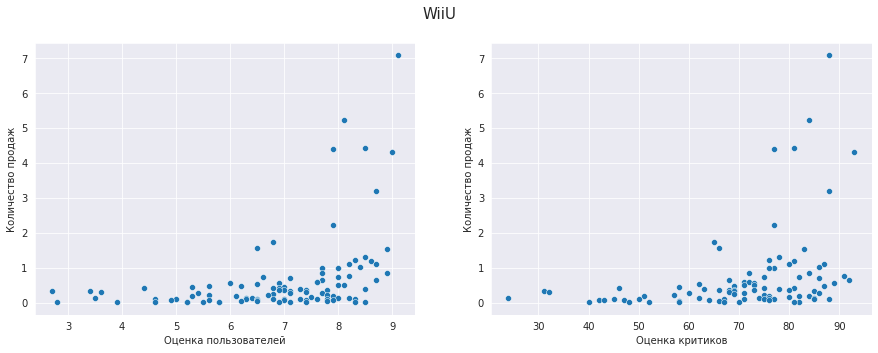

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.34837976012017485
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.4002190202148617






In [46]:
for platform in list_of_top_5:
    other_platform_grafiks(platform)

Ранее мы уже выявили общую прямую зависимость от отзывов пользователей и оценки критиков. Чем выше отзывы и оценки, тем больше пользователей покупают такие игры.

В платформе PS4 есть корреляция между отзывами критиков и продажами, а вот зависимости от отзывов пользователей отрицательная. То есть чем больше пользователей играет в эту игру, тем меньше ее покупают.

В платформе XOne есть прямая корреляция между отзывами критиков и продажами, то есть чем выше отзывы критиков, тем больше продажи. А вот зависимости между отзывами пользователей и продажами нет.

В платформе PS2 есть корреляция между отзывами критиков и продажами, а вот между отзывами пользователей и продажами она слабая.

В платформе PS3 есть корреляция между отзывами критиков и продажами. А между отзывами пользователей она не выявлена.

В платформе DS есть слабая корреляция между отзывами критиков и продажами. А между отзывами пользователей она не выявлена.

В общем, пользователи чаще опираются на оценки критиков, а не на отзывы других пользователей. Я думаю это происходит потому что критики более беспристрастные, а пользователи оценивают игру на основе собственного субъективного опыта.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сделаем сводную таблицу и рассмотрим данные по среднему.

In [47]:
distr_genre_mean = top_5_platforms.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values(
    by='sum_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre_mean

,genre,sum_sales
0,Shooter,1.659318
1,Sports,0.836330
2,Role-Playing,0.496452
3,Action,0.469267
4,Platform,0.425000
5,Misc,0.424000
6,Racing,0.410227
7,Fighting,0.327949
8,Simulation,0.177273
9,Adventure,0.174603


Самые прибыльные жанры - это Shooter, Sports, Role-Playing. А меньше всего прибыли приносят игры в жанрах Adventure, Strategy, Puzzle.

Сделаем сводную таблицу и рассмотрим данные по медиане.

In [48]:
distr_genre_median = top_5_platforms.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(
    by='sum_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre_median

,genre,sum_sales
0,Shooter,0.685
1,Sports,0.300
2,Fighting,0.150
3,Platform,0.150
4,Role-Playing,0.140
5,Action,0.130
6,Misc,0.130
7,Racing,0.125
8,Simulation,0.120
9,Strategy,0.070


По медиане самые прибыльные жанры - это Shooter, Sports, а меньше всего прибыли приносят игры в жанрах Puzzle.

Отрисуем график, чтобы это распределение было видно наглядно.

Text(0, 0.5, 'Продажи')

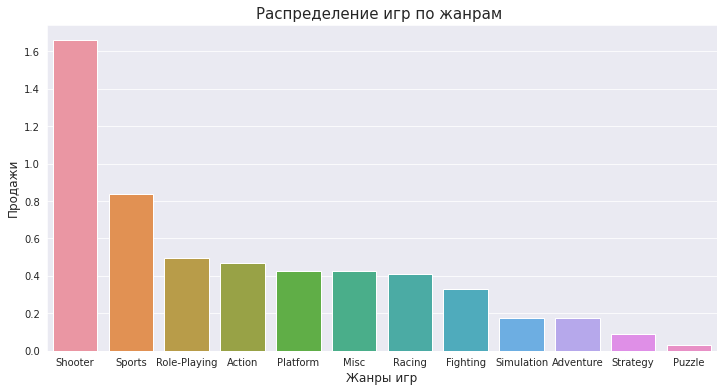

In [49]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre_mean, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

И еще один график по медиане.

Text(0, 0.5, 'Продажи')

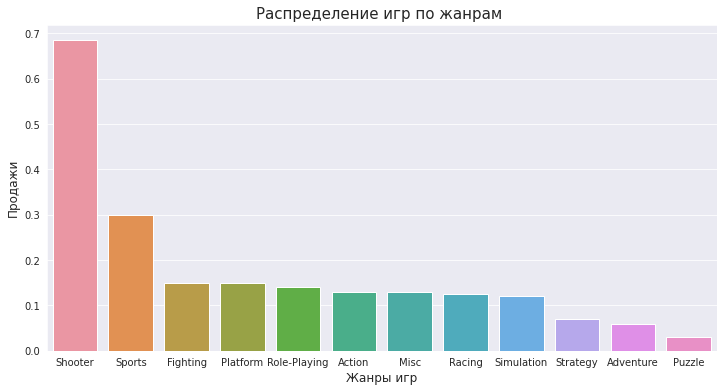

In [50]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre_median, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Итого, по двум графикам самые прибыльные жанры - это шутер и спорт. А самые низкобюджетный - пазлы.

График полностью подтверждает мои слова.

### Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Портрет пользователя North America

Посмотрим сначала сводную таблицу по популярным платформам.

<AxesSubplot:xlabel='platform'>

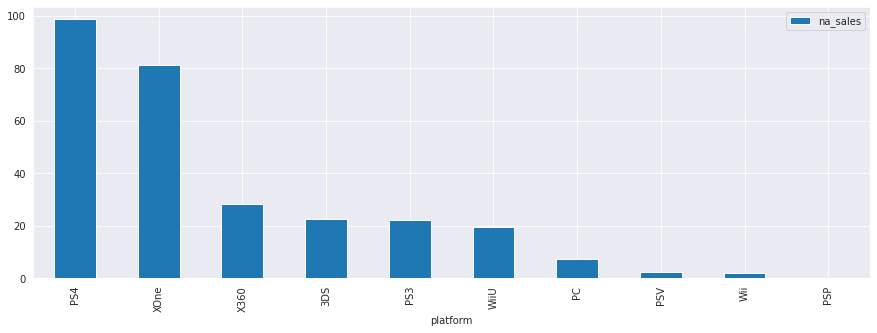

In [53]:
period_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

Теперь выведем график с популярными жанрами.

<AxesSubplot:xlabel='genre'>

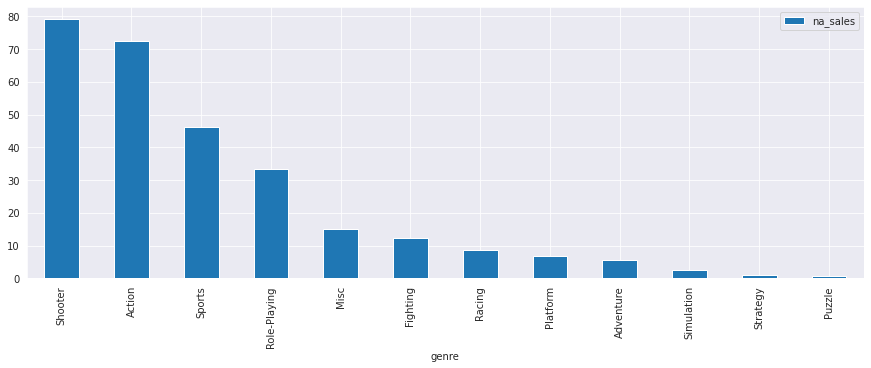

In [54]:
period_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

Ну а теперь посмотрим оценки, которые пользователи Северной Америки чаще всего ставят играм.

<AxesSubplot:xlabel='rating'>

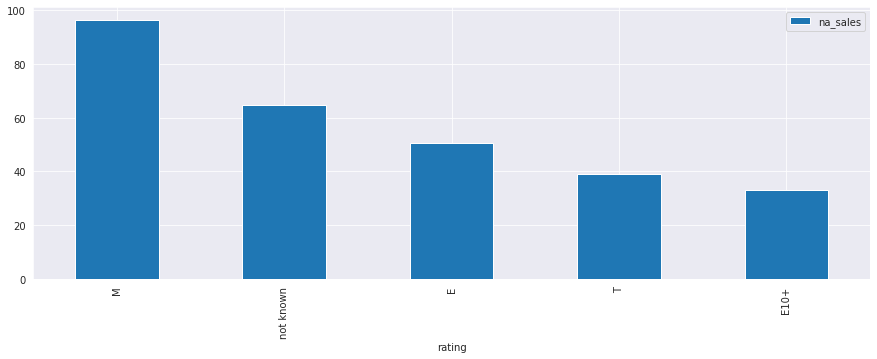

In [55]:
period_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

В Северной Америке самые популярные платформы это PS4, XOne, X360.
Самые популярные жанры - это  Shooter, Action, Sports.
И чаще всего играм ставили рейтинг M.

Составим портрет для пользователей EU.

<AxesSubplot:xlabel='platform'>

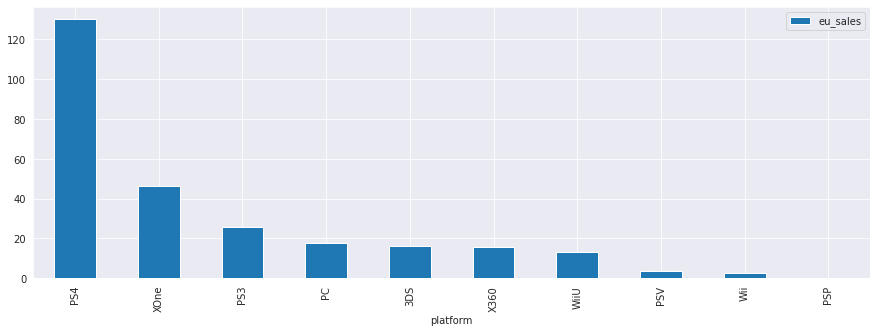

In [59]:
period_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='genre'>

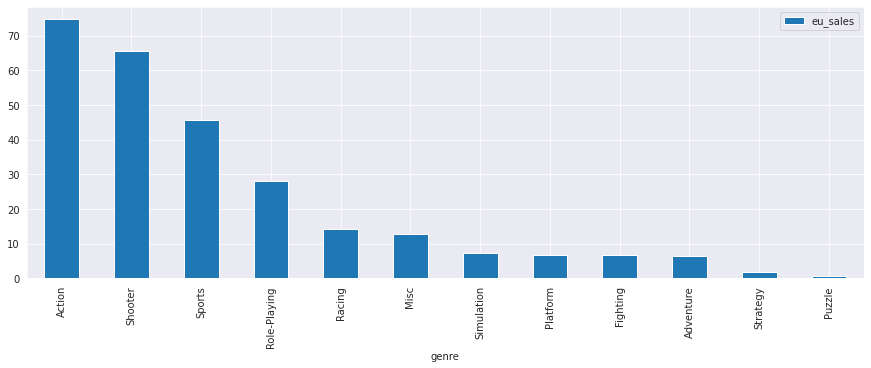

In [60]:
period_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='rating'>

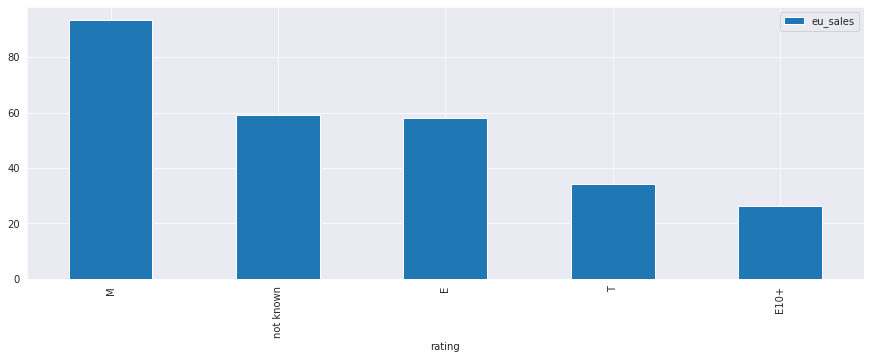

In [61]:
period_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

За весь период времени люди в Европе чаще всего играли в PS4, XOne, PS3 в жарнре Action, Shooter, Sports. А критики чаще всего ставили оценки M играм.

А за последний год в лидеры выбилась платформа PS4, жанр игры Shooter и рейтинг М.

Составим портрет для пользователей JP.

<AxesSubplot:xlabel='platform'>

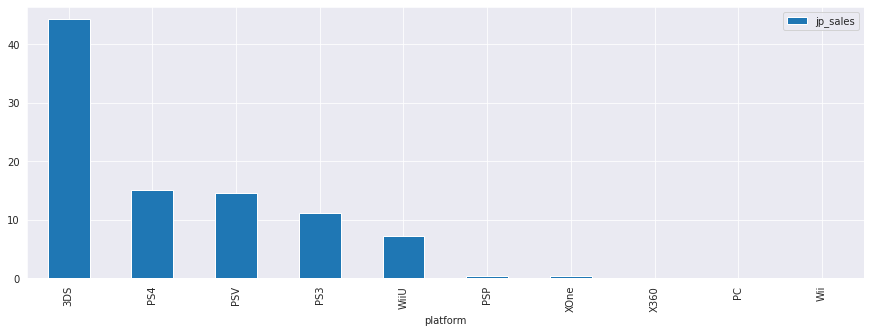

In [65]:
period_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='genre'>

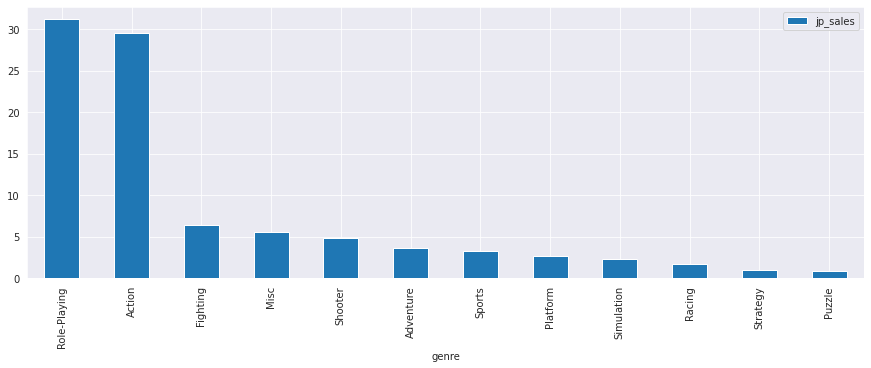

In [66]:
period_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='rating'>

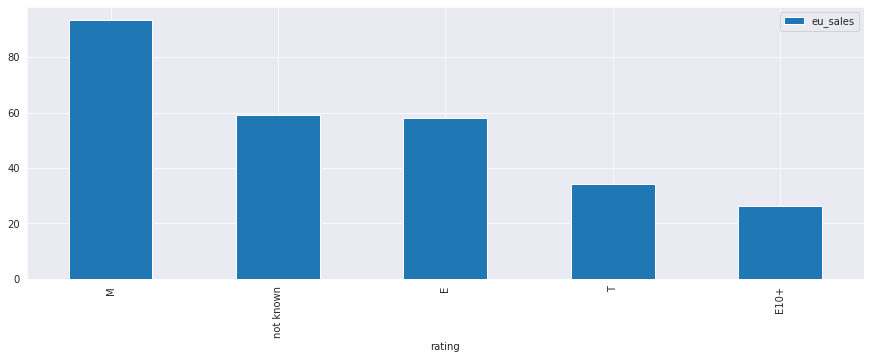

In [67]:
period_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

В Японии в лидерах была платформа 3DС, PS4, PSV, жанр Role-Playing, Action, а вот рейтинг там ставили M.

За последний год японцы чаще всего использовали платформу 3DS и PS4, жанр игры Action, а вот оценки там не прижились. В Японии очень сильно отличаются данные за весь период и за последний год. Соответственно, можно сделать вывод, что тренды на компьютерные игры там меняются еще быстрее, чем во всем остальном мире. В частности на жанры, которые имеют большую популярность у японцев.

### Проверьте гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для начала сформулируем гипотезы:

Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [69]:
xone_hypothesis = data[(data['platform']=='XOne') & (data['year_of_release']>2013)]['user_score']
pc_hypothesis = data[(data['platform']== 'PC') & (data['year_of_release']>2013)]['user_score']

Посчитаем средний рейтинг для платформ.

In [70]:
xone_hypothesis.mean()

6.594545454545454

In [71]:
pc_hypothesis.mean()

6.298360655737704

Теперь проверим дисперсии выборок.

In [72]:
np.var(data[data['platform']=='XOne']['user_score'])

1.8965188383045526

In [73]:
np.var(data[data['platform']=='PC']['user_score'])

2.3377471580367684

Проверим нашу гипотезу. Для этого используем метод ttest_ind.

In [74]:
alpha = .01

results = st.ttest_ind(xone_hypothesis.dropna(), pc_hypothesis.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение р 0.059 то есть 5,9%. Нулевую гипотезу отвергнуть не получилось.


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для начала сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [75]:
genre_action_hypothesis = data[(data['genre']=='Action') & (data['year_of_release']>2013)]['user_score']
genre_sports_hypothesis = data[(data['genre']=='Sports') & (data['year_of_release']>2013)]['user_score']

Выведем среднее.

In [76]:
genre_action_hypothesis.mean()

6.760606060606061

In [77]:
genre_sports_hypothesis.mean()

5.225196850393701

Теперь проверим дисперсии выборок.

In [78]:
np.var(data[data['genre']=='Action']['user_score'])

2.0306366538266296

In [79]:
np.var(data[data['genre']=='Sports']['user_score'])

2.5941606711770175

Проверим нашу гипотезу. Для этого используем метод ttest_ind.

In [80]:
alpha = .01

results = st.ttest_ind(genre_action_hypothesis.dropna(), genre_sports_hypothesis.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Значит по жанрам экшн и спорт нет вероятности получить одинаковые средние рейтинги.


### Напишите общий вывод

Игры, которые мы исследовали в данном датасете выпускались с 1980 года, а с 1992 года начался рост продаж игр. Самое большое количество игр было продано в 2007 году.

Больше всего игр продавалось на платформах: PS4, PS3 и XOne

В среднем платформы существовали около 10 лет. Но есть платормы, которые существовали намного меньше. Скорее всего они выпускали менее популярные и успешные игры, поэтому такие проекты прожили намного меньше, чем их конкуренты.

Чем выше оценка пользователей, тем чаще покупают эти игры. Начиная от 5.5 пользователи чаще покупают игры, а игры с рейтингом ниже 5.5 покупают реже. Это и логично, потому что перед приобретением многие читают отзывы, опираются на слова тех, кто уже попробовал игру. И если она не понравилась большинству и заслужила низкий рейтинг, то скорее всего ее не будут покупать, а купят что-то от чего другие были в восторге.

Также есть прямая зависимость оценок критиков от покупок. Чем выше оценка критиков, тем больше количество покупок. Я думаю, это связано с тем, что критики действительно отбирают хорошие игры. Смотрят на разные показатели, такие как графика, механика и другие. И когда выходит игра, в которую действительно интересно играть, то критики присваивают ей высокие баллы. Поэтому примерно от 60 баллов количество купленных игр возрастает. И чем больше баллов у игры, тем большее количество людей покупает игру с высоким рейтингом. Но, к сожалению, в 100 баллов не оценили ни одну игру. Ну может быть все впереди.

Если сравнивать то, на чье мнение опираются пользователи при покупке игр, то оценкам критиков доверяют больше, чем мнению других пользователей. К тому же, здесь есть и другая причина. В компьютерных играх тренды меняются очень быстро. Соответственно, когда выходит новая игра, то первыми ее обозревают обзорщики. А потом на основе их отзывов начинают покупать пользователи. Соответственно, к тому времени, когда большинство пользователей оставили свои оценки, тренд уже сменился и вышло что-то новенькое.  


Самые прибыльные жанры - это Shooter и Sports. А меньше всего прибыли приносят игры в жанре Puzzle.

В Северной Америке самые популярные платформы это PS4, XOne, X360. Самые популярные жанры - это Shooter, Action, Sports. И чаще всего играм ставили рейтинг M.

В 2016 году жители Северной Америки чаще всего играли в PS4, в жанре Shoooter и ставили оценку М играм.

За весь период времени люди в Европе чаще всего играли в PS4, XOne, PS3 в жанре Action, Shooter, Sports. А критики чаще всего ставили оценки M играм.

А за последний год в лидеры выбилась платформа PS4, жанр игры Shooter и рейтинг М.

В Японии в лидерах была платформа 3DС, PS4, PSV, жанр Role-Playing, Action, а вот рейтинг там ставили M.

За последний год японцы чаще всего использовали платформу 3DS и PS4, жанр игры Action, а вот оценки там не прижились. В Японии очень сильно отличаются данные за весь период и за последний год. Соответственно, можно сделать вывод, что тренды на компьютерные игры там меняются еще быстрее, чем во всем остальном мире. В частности на жанры, которые имеют большую популярность у японцев.